<a href="https://colab.research.google.com/github/cesarrivera52/Evidencia3/blob/main/Evidencia3_Rregresi%C3%B3nCostu5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#César Alejandro Rivera Guzmán  A01567012
#Evidencia 3
#Regresión 5
#Costumer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
files.upload()

In [ ]:
data=pd.read_csv('consumer_limpio_4.csv')
data

,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,...,309_wiretransfers_in_store,320_other_services_in_store,304_additional_services_store,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,0,060a856c-e3b8-41a7-b680-9756172d1c29,"November 12, 2022",2022-11-12 22:43:08 UTC,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,agua de coco,0 a 3 cuadras,...,no,no,no_data_additional_services,1,1,0,0,0,0,35
1,1,c42fdf22-b93b-443e-8f46-6043613cb0c3,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,agua de coco,7 a 10 cuadras,...,no,no,no_data_additional_services,1,1,2,0,35,50,27
2,2,3ccaedc0-949e-4555-afad-b2e1d77c3219,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,agua de coco,más de 10 cuadras,...,no,no,no_data_additional_services,1,0,0,0,40,25,42
3,3,91d8a240-af2c-451b-900f-3480f82e05db,"November 12, 2022",2022-11-12 20:41:38 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,agua de coco,4 a 6 cuadras,...,no,no,no_data_additional_services,1,2,3,0,0,0,27
4,4,3efefc56-bd45-4e4a-bf02-ab725e9fb41a,"November 12, 2022",2022-11-12 19:49:13 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,agua de coco,más de 10 cuadras,...,no,no,no_data_additional_services,1,2,5,0,0,50,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,Ablandador de agujas,20 min,...,no,no,Los anteriores mencionados,1,15,10,0,100,100,15
111,111,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,Ablandador de agujas,30 min,...,no,no,Los anteriores mencionados,1,1,1,0,50,70,21
112,112,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,Ablandador de agujas,0 a 3 cuadras,...,no,no,Los anteriores mencionados,1,3,2,0,0,0,18
113,113,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,Ablandador de agujas,más de 10 cuadras,...,no,no,Los anteriores mencionados,1,2,4,0,30,100,18


In [ ]:
#Eliminar columnas innecesarias
datam1=data.drop(["Unnamed: 0","_record_id","_title","_server_updated_at","_geometry"],axis=1)

In [ ]:
datam1.info()

In [ ]:
#Filtro para separar variables cualitativas
fdatam_cual=datam1.iloc[:,0:18]
fdatam_cual.head(5)

,_updated_by,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,284_additional_products_store,301_electricity_bill,305_electricity_bill_store,302_water_bill,306_water_bill_store,303_gas_bill,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store
0,Ulises Núñez Bautista,Efectivo,no,agua de coco,0 a 3 cuadras,A pie,no_data_additional_product,Tienda de conveniencia (e.g. OXXO),no,Sistema de agua,no,Proveedor de gas,no,No lo hago,no,Banco,no,no
1,Salomon Abdala Perez,Efectivo,yes,agua de coco,7 a 10 cuadras,A pie,no_data_additional_product,Tienda de conveniencia (e.g. OXXO),no,Sistema de agua,no,Proveedor de gas,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no
2,Salomon Abdala Perez,Efectivo,yes,agua de coco,más de 10 cuadras,Automóvil,no_data_additional_product,CFE,yes,Tienda de conveniencia (e.g. OXXO),yes,Proveedor de gas,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no
3,Jorge Alberto Ostorga Flores,Tarjeta de débito y/o crédito,yes,agua de coco,4 a 6 cuadras,Motocicleta,no_data_additional_product,Supermercado,no,Supermercado,no,Proveedor de gas,no,No lo hago,no,Banco,no,no
4,Jorge Alberto Ostorga Flores,Efectivo,yes,agua de coco,más de 10 cuadras,Transporte público,no_data_additional_product,CFE,no,Supermercado,no,Proveedor de gas,no,Supermercado,no,No lo hago,no,no


In [ ]:
#Filtro para separar variables cuantitativas
fdatam_cuan=datam1.iloc[:,19:25]
fdatam_cuan.head(5)

,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery
0,1,1,0,0,0,0
1,1,1,2,0,35,50
2,1,0,0,0,40,25
3,1,2,3,0,0,0
4,1,2,5,0,0,50


In [ ]:
#Cargar archivo csv desde seaborn
df=pd.concat([fdatam_cuan,fdatam_cual], axis=1)
df.head(5)

,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,_updated_by,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,...,305_electricity_bill_store,302_water_bill,306_water_bill_store,303_gas_bill,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store
0,1,1,0,0,0,0,Ulises Núñez Bautista,Efectivo,no,agua de coco,...,no,Sistema de agua,no,Proveedor de gas,no,No lo hago,no,Banco,no,no
1,1,1,2,0,35,50,Salomon Abdala Perez,Efectivo,yes,agua de coco,...,no,Sistema de agua,no,Proveedor de gas,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no
2,1,0,0,0,40,25,Salomon Abdala Perez,Efectivo,yes,agua de coco,...,yes,Tienda de conveniencia (e.g. OXXO),yes,Proveedor de gas,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no
3,1,2,3,0,0,0,Jorge Alberto Ostorga Flores,Tarjeta de débito y/o crédito,yes,agua de coco,...,no,Supermercado,no,Proveedor de gas,no,No lo hago,no,Banco,no,no
4,1,2,5,0,0,50,Jorge Alberto Ostorga Flores,Efectivo,yes,agua de coco,...,no,Supermercado,no,Proveedor de gas,no,Supermercado,no,No lo hago,no,no


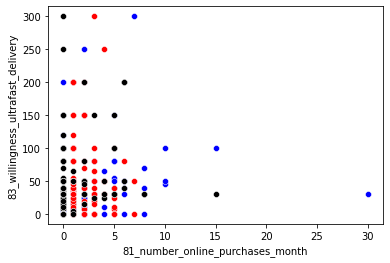

In [ ]:
#Se grafican mapas de dispersión de las variables 3 variables:'81_number_online_purchases_month', '238_frequency_buying_store' y '83_willingness_ultrafast_delivery' al respecto a la variable "81_number_online_purchases_month"
from turtle import color

sns.scatterplot(x='81_number_online_purchases_month', y='83_willingness_ultrafast_delivery', color="blue", data=df)
sns.scatterplot(x='238_frequency_buying_store', y='83_willingness_ultrafast_delivery', color="red", data=df)
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='83_willingness_ultrafast_delivery', color="black", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= df[['81_number_online_purchases_month', '238_frequency_buying_store','289_number_whatsapp_purchases_month']]
Var_Dep1= df['83_willingness_ultrafast_delivery']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model1)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['81_number_online_purchases_month', '238_frequency_buying_store',
        '289_number_whatsapp_purchases_month'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.88279989, 0.32232533, 3.22484835]),
 '_residues': 318031.3768723686,
 'rank_': 3,
 'singular_': array([39.31386855, 25.09147647, 15.13312465]),
 'intercept_': 41.69797800795904}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model1.score(Vars_Indep1,Var_Dep1)

0.024348900764908366

MODELO *PREDICTIVO*

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred1= model1.predict(X=df[['81_number_online_purchases_month','238_frequency_buying_store','289_number_whatsapp_purchases_month']])
y_pred1

array([42.90310323, 42.90310323, 42.02030334, 43.78590312, 43.78590312,
       42.02030334, 49.35279993, 42.90310323, 42.664954  , 43.22542856,
       45.07520445, 61.36939344, 43.22542856, 44.10822845, 43.78590312,
       43.54775389, 43.78590312, 42.34262867, 45.07520445, 42.664954  ,
       44.99102834, 43.78590312, 42.664954  , 44.10822845, 42.90310323,
       42.90310323, 42.02030334, 50.37200378, 43.78590312, 49.35279993,
       56.10884783, 43.95425533, 43.87007923, 48.28407867, 44.75287911,
       43.95425533, 45.95800434, 44.10822845, 45.5515029 , 43.78590312,
       63.45731855, 42.02030334, 42.34262867, 45.5515029 , 44.43055378,
       44.99102834, 47.63942801, 43.22542856, 46.43430279, 45.24515169,
       42.02030334, 43.54775389, 48.84455323, 44.10822845, 44.66870301,
       42.02030334, 42.02030334, 42.02030334, 43.63193   , 51.20257581,
       43.78590312, 68.50430001, 43.30960467, 51.76305037, 50.88025048,
       66.97254398, 60.2324702 , 47.07895345, 44.75287911, 44.19

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred1)
df

,Predicciones,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,_updated_by,282_payment_method_that_purchase,283_fulfill_needs,...,305_electricity_bill_store,302_water_bill,306_water_bill_store,303_gas_bill,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store
0,42.903103,1,1,0,0,0,0,Ulises Núñez Bautista,Efectivo,no,...,no,Sistema de agua,no,Proveedor de gas,no,No lo hago,no,Banco,no,no
1,42.903103,1,1,2,0,35,50,Salomon Abdala Perez,Efectivo,yes,...,no,Sistema de agua,no,Proveedor de gas,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no
2,42.020303,1,0,0,0,40,25,Salomon Abdala Perez,Efectivo,yes,...,yes,Tienda de conveniencia (e.g. OXXO),yes,Proveedor de gas,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no
3,43.785903,1,2,3,0,0,0,Jorge Alberto Ostorga Flores,Tarjeta de débito y/o crédito,yes,...,no,Supermercado,no,Proveedor de gas,no,No lo hago,no,Banco,no,no
4,43.785903,1,2,5,0,0,50,Jorge Alberto Ostorga Flores,Efectivo,yes,...,no,Supermercado,no,Proveedor de gas,no,Supermercado,no,No lo hago,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,55.262302,1,15,10,0,100,100,Daniel Serrano,Efectivo,yes,...,no,No lo hago,no,No lo hago,no,No lo hago,no,No lo hago,no,no
111,42.903103,1,1,1,0,50,70,Daniel Serrano,Efectivo,yes,...,no,No lo hago,no,No lo hago,no,No lo hago,no,No lo hago,no,no
112,44.668703,1,3,2,0,0,0,Fernando Gonzálezinactivo,Efectivo,yes,...,no,No lo hago,no,No lo hago,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no
113,43.785903,1,2,4,0,30,100,Fernando Gonzálezinactivo,Efectivo,yes,...,no,No lo hago,no,No lo hago,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no


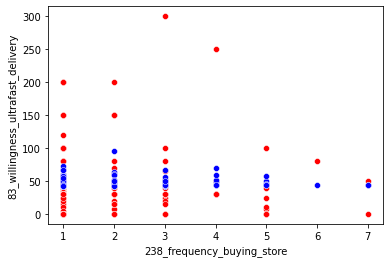

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='238_frequency_buying_store', y='83_willingness_ultrafast_delivery', color="red", data=df)
sns.scatterplot(x='238_frequency_buying_store', y='Predicciones', color="blue", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.024348900764908366

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.15604134312709683